In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [5]:
pd.__version__

'1.4.2'

In [6]:
!pip install pyarrow

In [7]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-04.parquet')

In [8]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.0,5.20,1.0,N,161,7,1,29.6,3.5,0.5,8.65,0.0,1.0,43.25,2.5,0.0
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.0,5.60,1.0,N,264,264,1,25.4,1.0,0.5,10.00,0.0,1.0,37.90,0.0,0.0
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.0,3.55,1.0,N,186,236,1,20.5,1.0,0.5,5.10,0.0,1.0,30.60,2.5,0.0
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.0,1.06,1.0,N,137,164,2,10.0,1.0,0.5,0.00,0.0,1.0,15.00,2.5,0.0
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.0,0.70,1.0,N,236,263,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0


In [9]:
import sklearn

In [10]:
sklearn.__version__

'1.0.2'

In [11]:
df['duration']= df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [12]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.0,5.20,1.0,N,161,7,1,29.60,3.5,0.5,8.65,0.00,1.0,43.25,2.5,0.0,0 days 00:28:02
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.0,5.60,1.0,N,264,264,1,25.40,1.0,0.5,10.00,0.00,1.0,37.90,0.0,0.0,0 days 00:14:17
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.0,3.55,1.0,N,186,236,1,20.50,1.0,0.5,5.10,0.00,1.0,30.60,2.5,0.0,0 days 00:16:48
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.0,1.06,1.0,N,137,164,2,10.00,1.0,0.5,0.00,0.00,1.0,15.00,2.5,0.0,0 days 00:09:07
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.0,0.70,1.0,N,236,263,1,5.10,3.5,0.5,2.00,0.00,1.0,12.10,2.5,0.0,0 days 00:01:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514284,2,2024-04-30 23:11:14,2024-04-30 23:52:18,NaN,21.40,NaN,None,155,107,0,62.95,0.0,0.5,0.00,6.94,1.0,73.89,NaN,NaN,0 days 00:41:04
3514285,2,2024-04-30 23:14:54,2024-04-30 23:15:05,NaN,0.00,NaN,None,48,48,0,33.25,0.0,0.5,0.00,0.00,1.0,37.25,NaN,NaN,0 days 00:00:11
3514286,2,2024-04-30 23:16:22,2024-04-30 23:26:46,NaN,1.98,NaN,None,161,234,0,24.27,0.0,0.5,0.00,0.00,1.0,28.27,NaN,NaN,0 days 00:10:24
3514287,2,2024-04-30 23:04:10,2024-04-30 23:09:25,NaN,0.31,NaN,None,148,79,0,19.13,0.0,0.5,0.00,0.00,1.0,23.13,NaN,NaN,0 days 00:05:15


In [13]:
td = df.duration.iloc[0]

In [14]:
td

Timedelta('0 days 00:28:02')

In [15]:
td.total_seconds() / 60

28.033333333333335

In [16]:
df.duration = df.duration.apply(lambda td : td.total_seconds() / 60)

In [17]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.0,5.20,1.0,N,161,7,1,29.60,3.5,0.5,8.65,0.00,1.0,43.25,2.5,0.0,28.033333
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.0,5.60,1.0,N,264,264,1,25.40,1.0,0.5,10.00,0.00,1.0,37.90,0.0,0.0,14.283333
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.0,3.55,1.0,N,186,236,1,20.50,1.0,0.5,5.10,0.00,1.0,30.60,2.5,0.0,16.800000
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.0,1.06,1.0,N,137,164,2,10.00,1.0,0.5,0.00,0.00,1.0,15.00,2.5,0.0,9.116667
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.0,0.70,1.0,N,236,263,1,5.10,3.5,0.5,2.00,0.00,1.0,12.10,2.5,0.0,1.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514284,2,2024-04-30 23:11:14,2024-04-30 23:52:18,NaN,21.40,NaN,None,155,107,0,62.95,0.0,0.5,0.00,6.94,1.0,73.89,NaN,NaN,41.066667
3514285,2,2024-04-30 23:14:54,2024-04-30 23:15:05,NaN,0.00,NaN,None,48,48,0,33.25,0.0,0.5,0.00,0.00,1.0,37.25,NaN,NaN,0.183333
3514286,2,2024-04-30 23:16:22,2024-04-30 23:26:46,NaN,1.98,NaN,None,161,234,0,24.27,0.0,0.5,0.00,0.00,1.0,28.27,NaN,NaN,10.400000
3514287,2,2024-04-30 23:04:10,2024-04-30 23:09:25,NaN,0.31,NaN,None,148,79,0,19.13,0.0,0.5,0.00,0.00,1.0,23.13,NaN,NaN,5.250000


In [18]:
df.duration.describe(percentiles=[0.95,0.98,0.99])

count    3.514289e+06
mean     1.704487e+01
std      3.516886e+01
min     -3.873333e+01
50%      1.280000e+01
95%      4.208333e+01
98%      5.685000e+01
99%      6.753333e+01
max      9.767517e+03
Name: duration, dtype: float64

In [19]:
df= df[(df.duration>=1) & (df.duration <=60)]

In [20]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,1,2024-04-01 00:02:40,2024-04-01 00:30:42,0.0,5.20,1.0,N,161,7,1,29.60,3.5,0.5,8.65,0.00,1.0,43.25,2.5,0.0,28.033333
1,2,2024-04-01 00:41:12,2024-04-01 00:55:29,1.0,5.60,1.0,N,264,264,1,25.40,1.0,0.5,10.00,0.00,1.0,37.90,0.0,0.0,14.283333
2,2,2024-04-01 00:48:42,2024-04-01 01:05:30,1.0,3.55,1.0,N,186,236,1,20.50,1.0,0.5,5.10,0.00,1.0,30.60,2.5,0.0,16.800000
3,2,2024-04-01 00:56:02,2024-04-01 01:05:09,1.0,1.06,1.0,N,137,164,2,10.00,1.0,0.5,0.00,0.00,1.0,15.00,2.5,0.0,9.116667
4,1,2024-04-01 00:08:32,2024-04-01 00:10:24,1.0,0.70,1.0,N,236,263,1,5.10,3.5,0.5,2.00,0.00,1.0,12.10,2.5,0.0,1.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514283,2,2024-04-30 23:11:18,2024-04-30 23:20:04,NaN,1.24,NaN,None,230,68,0,11.74,0.0,0.5,3.15,0.00,1.0,18.89,NaN,NaN,8.766667
3514284,2,2024-04-30 23:11:14,2024-04-30 23:52:18,NaN,21.40,NaN,None,155,107,0,62.95,0.0,0.5,0.00,6.94,1.0,73.89,NaN,NaN,41.066667
3514286,2,2024-04-30 23:16:22,2024-04-30 23:26:46,NaN,1.98,NaN,None,161,234,0,24.27,0.0,0.5,0.00,0.00,1.0,28.27,NaN,NaN,10.400000
3514287,2,2024-04-30 23:04:10,2024-04-30 23:09:25,NaN,0.31,NaN,None,148,79,0,19.13,0.0,0.5,0.00,0.00,1.0,23.13,NaN,NaN,5.250000


In [21]:
categorical=['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [22]:
df[categorical]= df[categorical].astype(str)

/tmp/ipykernel_40953/3213588389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical]= df[categorical].astype(str)


In [23]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
duration                        float64
dtype: object

In [28]:
train_dicts= df[categorical + numerical].to_dict(orient='records')

In [29]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [30]:
X_train

<3416685x519 sparse matrix of type '<class 'numpy.float64'>'
	with 10250055 stored elements in Compressed Sparse Row format>

In [31]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [34]:
target = 'duration'
y_train = df[target].values


In [33]:
y

array([28.03333333, 14.28333333, 16.8       , ..., 10.4       ,
        5.25      , 10.75      ])

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


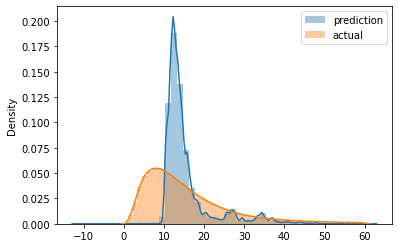

In [39]:
sns.distplot(y_pred , label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [41]:
mean_squared_error(y_train, y_pred, squared=False)

8.579457505468497